## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [1]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [5]:
# 把兩個訓練資料集和測試資料集讀進來

#絕對路徑
df_train = pd.read_csv("C:/Users/vincentLee1231995/OneDrive/Documents/Personal/Data-Analysis-in-60-Days/homework/DAY 38/Titanic_train.csv")
df_test = pd.read_csv("C:/Users/vincentLee1231995/OneDrive/Documents/Personal/Data-Analysis-in-60-Days/homework/DAY 38/Titanic_test.csv")

print(df_train.shape)
print(df_test.shape)


(891, 12)
(418, 11)


In [8]:
#相對路徑
df_train2 = pd.read_csv("./Titanic_train.csv")
df_test2 = pd.read_csv("./Titanic_test.csv")

print(df_train2.shape)
print(df_test2.shape)

(891, 12)
(418, 11)


# 相對/絕對路徑

使用路徑來匯入資料，會有兩種方式:

1.相對路徑
2.絕對路徑

在下列的表達式中，第5種為絕對路徑，也就是這個檔案最完整的路徑，從根目錄開始寫起。前4個則為相對路徑，相對路徑就是相對於目前編寫的python文件的路徑。

' / '：根目錄
' ./ '：當前同級目錄
' ../ '：上級目錄

1. open('檔名1.txt')
2. open('/data/檔名2.txt')
3. open('./data/檔名3.txt')
4. open('../data/檔名4.txt')
5. open('C:\\user\\檔名5.txt')

## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [9]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
'''
暗示，可以用那些函數，來看出資料的欄位變數
'''
print(df_test.columns)
print(df_train.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## A1 : Test 資料集沒有 'Survived'，此欄位為目標函數

## Q2: 測試資料集是否有遺失值?

In [10]:
#測試資料集的特性
print("資料筆數=",df_test.shape)

資料筆數= (418, 11)


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [17]:
# 判斷測試資料集，是否有遺失值
# 会判断哪些”列”存在缺失值
# any：判斷一個tuple或者list是否全為空，0，False。如果全為空，0，False，則返回False；如果不全為空，則返回True。
print(df_test.isnull().any())

print('==========================================')

# 統計 data 裡有空值的變數個數
print(df_test.isnull().any().sum())

print('==========================================')

# 統計 data 裡有空值的變數，各有多少個遺失值
print(df_test.isnull().sum())


PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
3
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


###  A2: 測試資料集有遺失值

## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [18]:
#合併資料
data = df_train.append(df_test)

print(data.info())

print('cabin 遺失個數=',data['Cabin'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None
cabin 遺失個數= 1014


In [19]:
# 以 Cabin 為例，先看 Cabin  出現值的特性
print(data["Cabin"].value_counts())


C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F2                 4
F4                 4
                  ..
E40                1
D6                 1
C97                1
D46                1
D56                1
Name: Cabin, Length: 186, dtype: int64


### cabin 不能隨意補值，須先進一步觀察和處理 
* 方法1:遺失的屬於另一類。  
* 方法2:看 cabin 和其他變數有無關係，可以進行補值。
* 方法3:遺失比例太高，可以先不放入模型。


In [26]:
pd.isnull(data['Cabin'])
pd.isnull(data['Cabin'][228])

228    False
228    False
Name: Cabin, dtype: bool

In [35]:
#* 方法1:遺失的屬於另一類。 

print(data['Cabin'].head(10))

print('==========================================')

data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin') 
#對Cabin欄位中的每個值跑迴圈，只要不是空值就印出該值的第一個字母(NoCabin例外，是空值也印出N)

data["Cabin"].unique()

0    N
1    C
2    N
3    C
4    N
5    N
6    E
7    N
8    N
9    N
Name: Cabin, dtype: object


array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

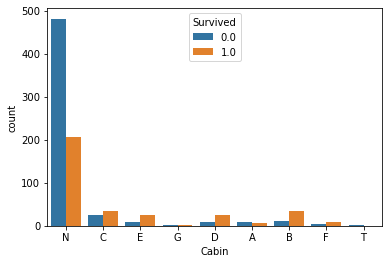

In [30]:
# 挑整後的 Cabin 觀察遺失的樣態
sns.countplot(data['Cabin'], hue=data['Survived'])
#結論，遺失的死亡率比較高

In [34]:
#數值計算
data[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#根據Cabin欄位值對Survived欄位值做groupby的平均值計算，再根據Survived欄位值做降冪排序

# NoCabin的比例和 T 較接近

,Cabin,Survived
3,D,0.757576
4,E,0.750000
1,B,0.744681
5,F,0.615385
2,C,0.593220
6,G,0.500000
0,A,0.466667
7,N,0.299854
8,T,0.000000
